## <center>[Urban Sound Classification](https://datahack.analyticsvidhya.com/contest/practice-problem-urban-sound-classification/) <br></center>
### Type : Multiclass Classification Problem
### Data : [Source](https://urbansounddataset.weebly.com/) <br>
### Machine Learning competition hosted on Analytics Vidhya
#### The dataset contains 8732 labeled sound excerpts (<=4s) of urban sound from 10 classes: Car Horn, Children Playing, Dog Bark, Drilling, Engine Idling, Gun Shot, Jackhammer, Siren, and Street Music

## Data Wrangling <br>

In this section of the project we will load and extract the features from sound clips, we will be using open source library called Librosa, for that. <br>

### Feature Extraction <br>

There are several methods to extract different features from the sound clips. We are going to use below mentioned methods to extract various features.  <br>
    - MelSpectogram: Represents an acoustic time - frequency representation of a sound.
    - mfcc : Mel-frequency cepstral coefficients
    - chroma_stft: Compute a chromagram from a waveform or power spectogram
    - spectral_contrast: Compute spectral contrast
    - tonnetz: Computes the tonal centroid features (tonnetz)

In [70]:
import glob
import os
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
import seaborn as sns; sns.set()
import scipy
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
%matplotlib inline

In [17]:
train = pd.read_csv('/Users/lucky/Large_Project_Files/Springboard_Capstone_Project_2/data_dir/data_dir/train.csv')
train.head(2)

ID         Class
0   0         siren
1   1  street_music

Function extraction() takes path to .csv file and sounds files, and extracts features using methods discussed above. 

In [119]:
def extraction():
    train = pd.read_csv('/Users/lucky/Capstone_Project_2/data_dir/data_dir/train.csv')
    features = np.empty((0,193))

    Classes = train.Class.unique().tolist()
    t, m, c, me, co = [], [], [], [], []
    y = []
    X = []; labels = []; new_X = []
    for i in train.ID:
        
        X, sample_rate = librosa.load('/Users/lucky/Capstone_Project_2/data_dir/data_dir/Train/%d.wav'%i, res_type = 'kaiser_fast')
        stft = np.abs(librosa.stft(X))
        
        tonnetz = np.mean(librosa.feature.tonnetz(y = librosa.effects.harmonic(X), sr = sample_rate).T,axis=0)
        mfccs = np.mean(librosa.feature.mfcc(y = X, sr = sample_rate, n_mfcc = 40).T, axis =0)
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
        
        ext_features = np.hstack([tonnetz, mfccs, chroma, mel, contrast])
        features = np.vstack([features, ext_features])
        idx = Classes.index(train[train.ID == i]['Class'].tolist()[0])
        labels.append(idx)
        
        t.append(tonnetz)
        m.append(mfccs)
        c.append(chroma)
        me.append(mel)
        co.append(contrast)
        #print (i)
        #X.append(ext_features)
    return t, m, c, me, co, features, labels







In [9]:
# Function extraction returns: tonnetz feature, mfccs features, chroma features, mel features,
# contrast features, X ( complete dataset of combined all the features) and labels

In [120]:
t, m, c, me, co, X, labels = extraction()

Savings features to .csv files

In [138]:
# Tonnetz features 
tonnetz = [x for x in t]
tonnetz = pd.DataFrame(tonnetz)
tonnetz['Class'] = train.Class
print("Tonnetz Shape: ", tonnetz.shape)
tonnetz.to_csv('tonnetz', index = False)

# Mfccs Features
mfccs = [x for x in m]
mfccs = pd.DataFrame(mfccs)
mfccs['Class'] = train.Class
print("Mfccs Shape: ",mfccs.shape)
mfccs.to_csv('mfccs', index = False)

# Chrome features
chroma = [x for x in c]
chroma = pd.DataFrame(chroma)
chroma['Class'] = train.Class
print("Chroma Shape: ",chroma.shape)
chroma.to_csv('chroma', index = False)

# Mel features
mel = [x for x in me]
mel = pd.DataFrame(mel)
mel['Class'] = train.Class
print("Mel Shape: ",mel.shape)
mel.to_csv('Mel', index = False)

# Contrast Features
contrast = [x for x in co]
contrast = pd.DataFrame(contrast)
contrast['Class'] = train.Class
print("Contrast Shape: ",contrast.shape)
contrast.to_csv('contrast', index = False)

# Complete features

X = [x for x in X]
df = pd.DataFrame(X)
df['labels'] = labels
df['Class'] = train.Class
df['SOUND_ID'] = train['ID']
print("df shape ", df.shape)
df.to_csv('sound_data', index = False)


Tonnetz Shape:  (5435, 7)
Mfccs Shape:  (5435, 41)
Chroma Shape:  (5435, 13)
Mel Shape:  (5435, 129)
Contrast Shape:  (5435, 8)
df shape  (5435, 196)


In [2]:
# Reading files
df = pd.read_csv('/Users/lucky/Large_Project_Files/Springboard_Capstone_Project_2/data_dir/sound_data')
mfccs = pd.read_csv('/Users/lucky/Large_Project_Files/Springboard_Capstone_Project_2/data_dir//mfccs')
tonnetz = pd.read_csv('/Users/lucky/Large_Project_Files/Springboard_Capstone_Project_2/data_dir//tonnetz')
chroma = pd.read_csv('/Users/lucky/Large_Project_Files/Springboard_Capstone_Project_2/data_dir//chroma')
mel = pd.read_csv('/Users/lucky/Large_Project_Files/Springboard_Capstone_Project_2/data_dir//Mel')
contrast = pd.read_csv('/Users/lucky/Large_Project_Files/Springboard_Capstone_Project_2/data_dir//contrast')

In [22]:
#df
print(df.shape)
df.head(2)

(5435, 196)


0         1         2         3         4         5          6  \
0 -0.004255  0.014481 -0.040945  0.001575 -0.005375  0.005263 -82.123589   
1  0.003579  0.010518 -0.084110 -0.005364  0.002909 -0.001546 -15.744005   

            7          8          9  ...        186        187        188  \
0  139.505916 -42.430865  24.827861  ...  23.510043  11.643552  13.098876   
1  124.119960 -29.428881  39.447193  ...  15.682245  12.363782  16.474374   

         189        190        191        192  labels         Class  SOUND_ID  
0  13.581493  15.363638  15.579931  38.242615       0         siren         0  
1  17.756651  18.226688  16.084883  36.831401       1  street_music         1  

[2 rows x 196 columns]

In [23]:
#tonnetz
print(tonnetz.shape)
tonnetz.head(2)

(5435, 7)


0         1         2         3         4         5         Class
0 -0.004255  0.014481 -0.040945  0.001575 -0.005375  0.005263         siren
1  0.003579  0.010518 -0.084110 -0.005364  0.002909 -0.001546  street_music

In [24]:
#chroma
print(chroma.shape)
chroma.head(2)

(5435, 13)


0         1         2         3         4         5         6  \
0  0.798327  0.840953  0.819065  0.806548  0.825886  0.849393  0.868582   
1  0.575610  0.546653  0.525930  0.508931  0.688916  0.691444  0.489670   

          7         8         9        10        11         Class  
0  0.825281  0.810259  0.772253  0.769334  0.796989         siren  
1  0.494667  0.543663  0.810689  0.785146  0.608858  street_music

In [25]:
#mel
print(mel.shape)
mel.head(2)

(5435, 129)


0          1          2          3          4          5          6  \
0  5.877411  20.340005  52.088254  38.230873  10.435853   9.489508  14.070208   
1  2.328741   5.625119  10.602100  22.258752  27.538066  53.135808  74.963405   

            7           8          9  ...       119       120       121  \
0   13.531418    9.395261   9.965685  ...  0.002137  0.001383  0.000757   
1  103.341443  158.113427  81.474295  ...  0.014340  0.008827  0.005069   

        122       123       124       125       126           127  \
0  0.000374  0.000128  0.000032  0.000007  0.000001  2.831150e-07   
1  0.002706  0.001259  0.000413  0.000092  0.000025  1.074347e-05   

          Class  
0         siren  
1  street_music  

[2 rows x 129 columns]

In [26]:
#contrast
print(contrast.shape)
contrast.head(2)

(5435, 8)


0          1          2          3          4          5  \
0  23.510043  11.643552  13.098876  13.581493  15.363638  15.579931   
1  15.682245  12.363782  16.474374  17.756651  18.226688  16.084883   

           6         Class  
0  38.242615         siren  
1  36.831401  street_music

In [27]:
df['Class'] = contrast.Class

In [28]:
df['labels'] = pd.factorize(df.Class)[0]

Checking for class distribution

In [29]:
print(df['labels'].value_counts()/len(df)*100)
df.Class.value_counts()/len(df)*100

8    12.290708
6    11.481141
0    11.168353
7    11.039558
3    11.039558
2    11.039558
1    11.039558
4    11.039558
9     5.630175
5     4.231831
Name: labels, dtype: float64


jackhammer          12.290708
engine_idling       11.481141
siren               11.168353
children_playing    11.039558
air_conditioner     11.039558
street_music        11.039558
dog_bark            11.039558
drilling            11.039558
car_horn             5.630175
gun_shot             4.231831
Name: Class, dtype: float64

car_horn and gun_shot have bit less than half amount of entries compared to other 8 classes. It does not look like it is severely unbalanced, So for now we will just leave them as is it.

In [30]:
df.describe()

0            1            2            3            4  \
count  5435.000000  5435.000000  5435.000000  5435.000000  5435.000000   
mean     -0.001268     0.007204    -0.002253     0.005342     0.001524   
std       0.016184     0.024454     0.068784     0.067080     0.017534   
min      -0.075327    -0.084762    -0.339900    -0.327500    -0.080453   
25%      -0.009541    -0.004510    -0.032757    -0.024529    -0.006574   
50%      -0.001197     0.004449    -0.002153     0.004375     0.001464   
75%       0.006714     0.016179     0.026637     0.036163     0.009487   
max       0.084937     0.363107     0.286856     0.482616     0.079516   

                 5            6            7            8            9  ...  \
count  5435.000000  5435.000000  5435.000000  5435.000000  5435.000000  ...   
mean      0.002941  -228.151062   116.777735   -29.223291    21.179727  ...   
std       0.018264   132.743770    48.193549    32.041379    22.241209  ...   
min      -0.072799  -765.879788   -55.461749  -165.823179   -62.845176  ...   
25%      -0.005412  -313.380253    88.710914   -47.168562     9.580795  ...   
50%       0.002000  -216.085723   122.717151   -26.312748    22.978465  ...   
75%       0.010165  -129.363869   149.344125    -8.849117    35.539948  ...   
max       0.211394   201.331057   270.124222    64.996571   114.069868  ...   

                185          186          187          188          189  \
count  5.435000e+03  5435.000000  5435.000000  5435.000000  5435.000000   
mean   4.034123e-01    18.361952    12.344112    15.177323    16.421931   
std    6.648775e+00     5.823751     2.202442     2.955838     3.804559   
min    3.611320e-12     9.860589     5.712008    10.108561    11.526399   
25%    9.095833e-08    13.959075    10.921031    13.182540    14.002597   
50%    6.446245e-07    17.102035    11.731881    14.379926    15.217259   
75%    3.586284e-06    21.150352    13.139180    16.254959    17.479691   
max    1.615727e+02    43.338260    30.107924    34.849633    42.788570   

               190          191          192       labels     SOUND_ID  
count  5435.000000  5435.000000  5435.000000  5435.000000  5435.000000  
mean     17.733984    18.465642    35.108951     4.267157  4367.264949  
std       3.595884     4.774269     4.436631     2.851627  2535.866061  
min      11.916354    13.405572    13.127255     0.000000     0.000000  
25%      15.281479    15.867467    32.826035     2.000000  2176.500000  
50%      16.729851    17.292074    34.603439     4.000000  4369.000000  
75%      19.022885    19.445478    36.686274     7.000000  6573.500000  
max      39.521396    64.221404    62.462670     9.000000  8729.000000  

[8 rows x 195 columns]

## EDA & Inferential Statistics

In [31]:
df.head()

0         1         2         3         4         5           6  \
0 -0.004255  0.014481 -0.040945  0.001575 -0.005375  0.005263  -82.123589   
1  0.003579  0.010518 -0.084110 -0.005364  0.002909 -0.001546  -15.744005   
2  0.001480 -0.004754  0.013450  0.027336 -0.009381 -0.004787 -123.393651   
3 -0.000115 -0.036755 -0.126208 -0.032240  0.059964 -0.026851 -213.278788   
4 -0.000755  0.010912  0.038104 -0.002897 -0.002296 -0.001802 -237.926479   

            7          8          9  ...        186        187        188  \
0  139.505916 -42.430865  24.827861  ...  23.510043  11.643552  13.098876   
1  124.119960 -29.428881  39.447193  ...  15.682245  12.363782  16.474374   
2   15.181946 -50.093329   7.141872  ...  13.333765  12.537974  14.122286   
3   89.323589 -55.256190  12.632100  ...  13.875088  11.235358  21.378771   
4  135.902461  39.268440  21.240239  ...  16.554962  12.984013  14.653759   

         189        190        191        192  labels         Class  SOUND_ID  
0  13.581493  15.363638  15.579931  38.242615       0         siren         0  
1  17.756651  18.226688  16.084883  36.831401       1  street_music         1  
2  14.026329  16.014898  17.437523  33.842876       2      drilling         2  
3  27.707693  21.865012  26.985645  46.478170       0         siren         3  
4  16.328755  16.190469  16.025189  33.775486       3      dog_bark         4  

[5 rows x 196 columns]

data contains numpy array representation of the audio sound, and sampling_rate has it's corresponding sampling rate by which it was extracted. Now let's plot waveforms of all of the classes and let's see how they differ.

## Air Conditioner

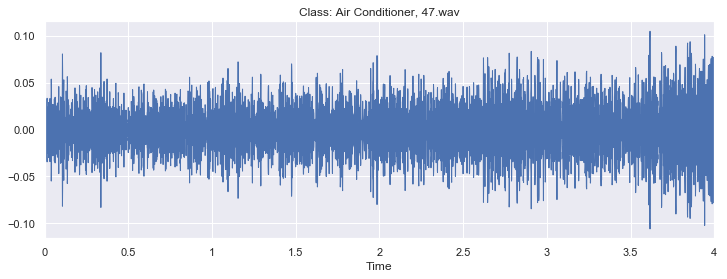

In [22]:
data, sampling_rate = librosa.load('/Users/lucky/Capstone_Project_2/data_dir/data_dir/Train/47.wav')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)
plt.title('Class: Air Conditioner, 47.wav')
ipd.Audio('/Users/lucky/Capstone_Project_2/data_dir/data_dir/Train/47.wav')

## Dog Bark

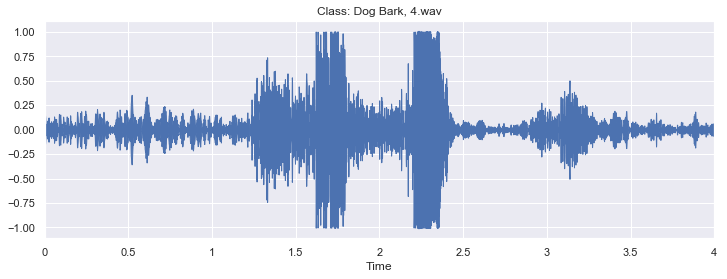

In [23]:
data, sampling_rate = librosa.load('/Users/lucky/Capstone_Project_2/data_dir/data_dir/Train/4.wav')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)
plt.title('Class: Dog Bark, 4.wav')
ipd.Audio('/Users/lucky/Capstone_Project_2/data_dir/data_dir/Train/4.wav')

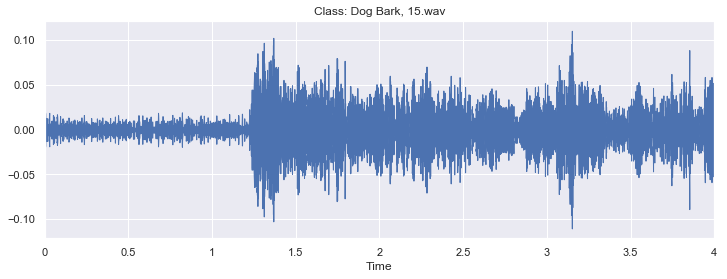

In [24]:
data, sampling_rate = librosa.load('/Users/lucky/Capstone_Project_2/data_dir/data_dir/Train/15.wav')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)
plt.title('Class: Dog Bark, 15.wav')
ipd.Audio('/Users/lucky/Capstone_Project_2/data_dir/data_dir/Train/15.wav')

## Drilling

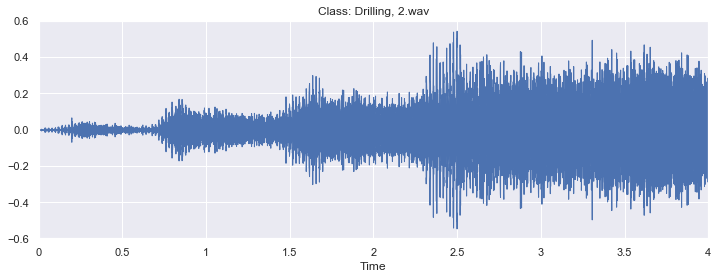

In [25]:
data, sampling_rate = librosa.load('/Users/lucky/Capstone_Project_2/data_dir/data_dir/Train/2.wav')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)
plt.title('Class: Drilling, 2.wav')
ipd.Audio('/Users/lucky/Capstone_Project_2/data_dir/data_dir/Train/2.wav')

## Children Playing

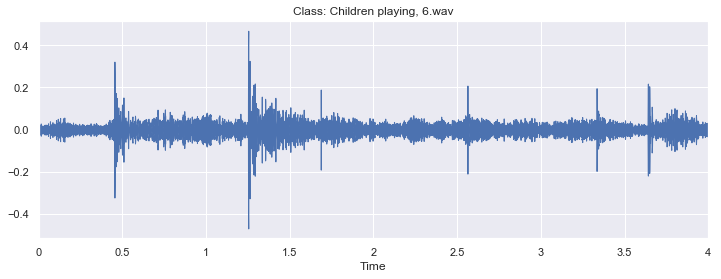

In [26]:
data, sampling_rate = librosa.load('/Users/lucky/Capstone_Project_2/data_dir/data_dir/Train/6.wav')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)
plt.title('Class: Children playing, 6.wav')
ipd.Audio('/Users/lucky/Capstone_Project_2/data_dir/data_dir/Train/6.wav')

## Street Music

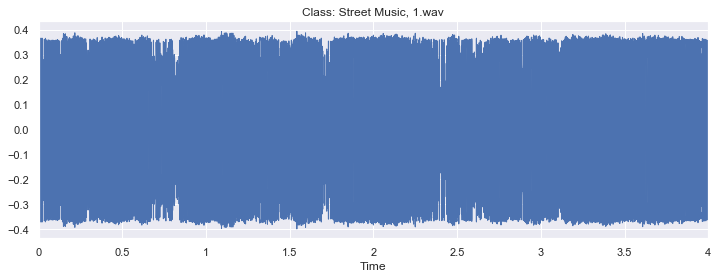

In [27]:
data, sampling_rate = librosa.load('/Users/lucky/Capstone_Project_2/data_dir/data_dir/Train/1.wav')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)
plt.title('Class: Street Music, 1.wav')
ipd.Audio('/Users/lucky/Capstone_Project_2/data_dir/data_dir/Train/1.wav')

## Car Horn

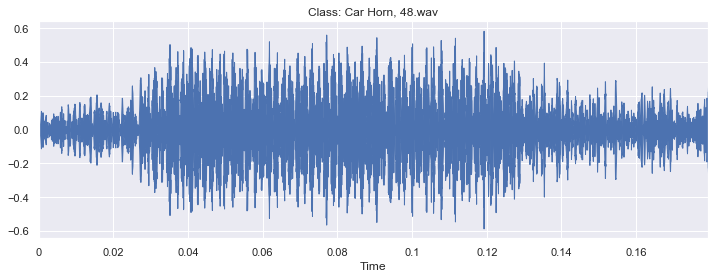

In [28]:
data, sampling_rate = librosa.load('/Users/lucky/Capstone_Project_2/data_dir/data_dir/Train/48.wav')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)
plt.title('Class: Car Horn, 48.wav')
ipd.Audio('/Users/lucky/Capstone_Project_2/data_dir/data_dir/Train/48.wav')

## Gun Shot

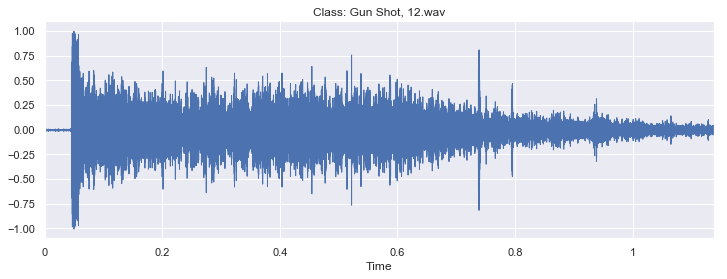

In [29]:
data, sampling_rate = librosa.load('/Users/lucky/Capstone_Project_2/data_dir/data_dir/Train/12.wav')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)
plt.title('Class: Gun Shot, 12.wav')
ipd.Audio('/Users/lucky/Capstone_Project_2/data_dir/data_dir/Train/12.wav')

As shown above in the plot, different classes have different types of soundwaves representations of their sound. <br>
#### Let's try to visualize all the features, and let's see if there is any pattern we can identify visually

## Tonnetz: Computes the tonal centroid features
Tonnetz dimensions: <br>
0: Fifth x-axis <br>
1: Fifth y-axis <br>
2: Minor x-axis <br>
3: Minor y-axis <br>
4: Major x-axis <br>
5: Major y-axis <br>


In [14]:
tonnetz.rename(index=str, columns={"0": 'fifth_x-axis', "1": 'fifth_y-axis', "2": "Minor_x-axis", "3" : 'Minor_y-axis', "4" : 'Major_x-axis', "5":'Major_y-axis'}, inplace= True)

In [15]:
tonnetz.groupby('Class')[tonnetz.columns].mean()

fifth_x-axis  fifth_y-axis  Minor_x-axis  Minor_y-axis  \
Class                                                                      
air_conditioner      -0.001472      0.011692     -0.031477     -0.017989   
car_horn             -0.000288      0.000034      0.033666      0.035895   
children_playing     -0.002735      0.009830     -0.001340      0.005324   
dog_bark             -0.001204      0.007786     -0.004871      0.010510   
drilling             -0.001121     -0.001702      0.006791     -0.002891   
engine_idling        -0.001936      0.015524      0.008817     -0.000748   
gun_shot             -0.002938      0.012825     -0.008543      0.015240   
jackhammer           -0.002333      0.001379      0.000283      0.026052   
siren                -0.002476      0.004168     -0.005641     -0.002407   
street_music          0.003430      0.010818     -0.007189      0.003491   

                  Major_x-axis  Major_y-axis  
Class                                         
air_conditioner       0.005124     -0.000325  
car_horn             -0.008971      0.004227  
children_playing      0.002783      0.002787  
dog_bark              0.003224      0.003127  
drilling              0.001371     -0.001655  
engine_idling         0.004624      0.007507  
gun_shot              0.003511      0.006710  
jackhammer           -0.002350      0.006083  
siren                 0.000970      0.001544  
street_music          0.001355      0.001839

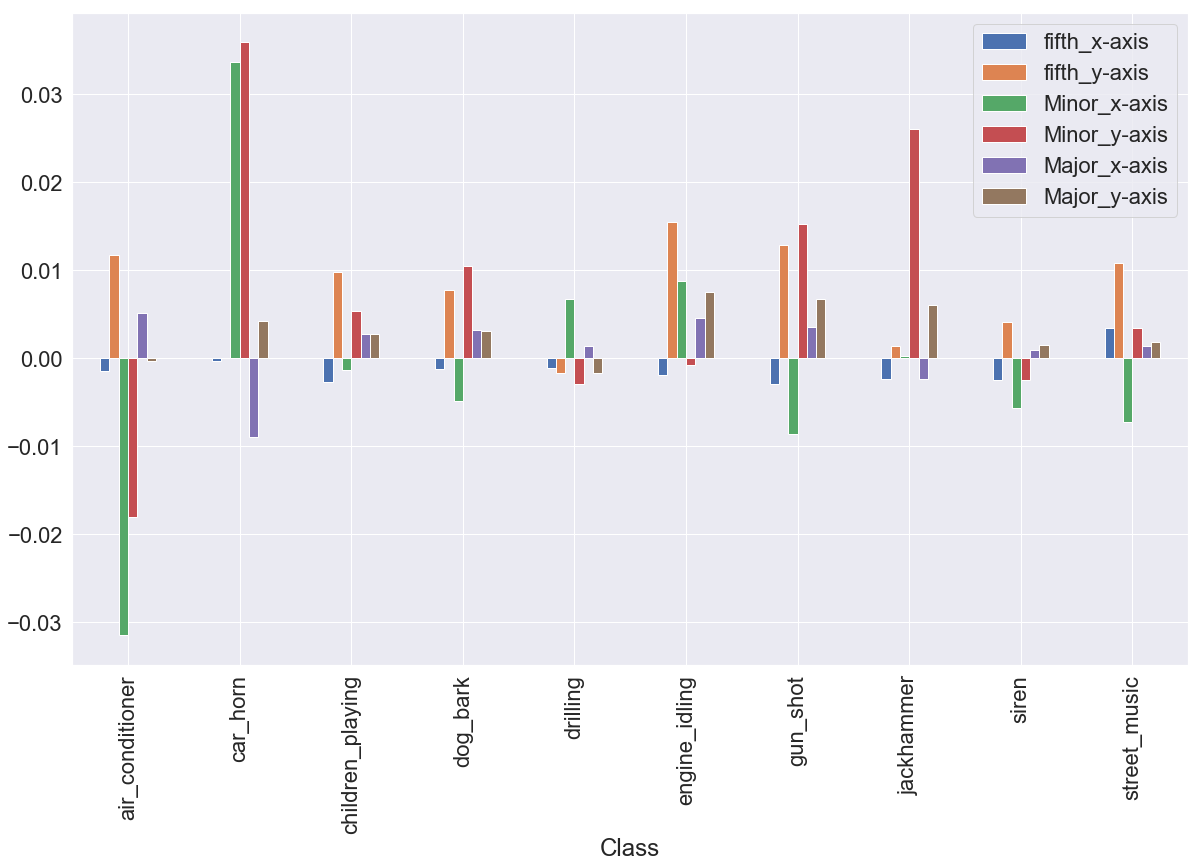

In [77]:
# Tonnetz
tonnetz.groupby('Class')[tonnetz.columns].mean().plot(kind = 'bar', figsize = (20, 12))
sns.set(font_scale = 2) 
plt.plot();


Above Line charts show average Tonal centroid features for each frame for different classes. A Noticeable pattern can be observe for following classes: car_horn and air_conditioner.
    - Average Minor_x-axis and Minor_y-axis is higher for car_horn class compare to other classes.
    - Average Minor_x-axis and minor_y-axis is the lowest for air_conditioner class.
On the other hand it's hard to differentiate visually between drilling, dog_bark, engine_idling and siren
    

### Is there a significant difference between Minor_x-axis of air_conditioner and Minor_x-axis of car_horn?

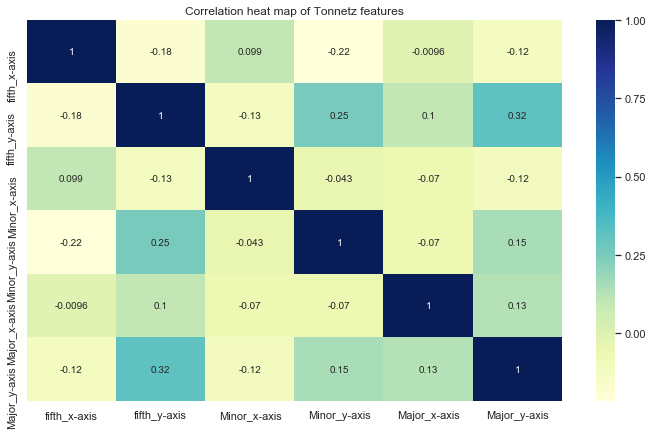

In [41]:
corr = tonnetz.corr()

# plot the heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(corr ,cmap="YlGnBu", annot=True)
plt.title('Correlation heat map of Tonnetz features')
plt.show()

/Users/lucky/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


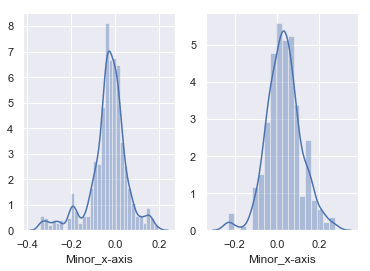

In [42]:
fig, ax = plt.subplots(1,2)
sns.distplot(tonnetz[tonnetz['Class'] == 'air_conditioner']['Minor_x-axis'], ax = ax[0])
sns.distplot(tonnetz[tonnetz['Class'] == 'car_horn']['Minor_x-axis'], ax = ax[1])
fig.show();

Ho: Variables are independent of each other <br>
H1: Variables are dependent of each other <br>
a = 0.05

Two Sample T-test

In [48]:
import scipy.stats as stats
stat, p = stats.ttest_ind(air_conditioner_Minor_y, car_horn_Minor_y)
if p < 0.05 :
    print('We should reject the null hypothesis, and accept the alternative.')
else:
    print('Null hypothesis can not be rejected.')
    

We should reject the null hypothesis, and accept the alternative.


### What about Minor_x-axis of drilling and Street Music?

/Users/lucky/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


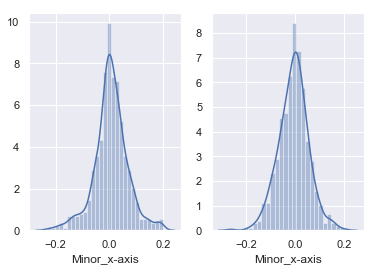

In [49]:
fig, ax = plt.subplots(1,2)
sns.distplot(tonnetz[tonnetz['Class'] == 'drilling']['Minor_x-axis'], ax = ax[0])
sns.distplot(tonnetz[tonnetz['Class'] == 'street_music']['Minor_x-axis'], ax = ax[1])
fig.show();

### Normality Test

In [74]:
k, p = scipy.stats.normaltest(tonnetz[tonnetz['Class'] == 'drilling']['Minor_x-axis'])
alpha = 0.05
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 4.18288e-06
The null hypothesis can be rejected


In [80]:
k, p = scipy.stats.normaltest(tonnetz[tonnetz['Class'] == 'street_music']['Minor_x-axis'])
alpha = 0.05
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0.00706718
The null hypothesis can be rejected


The distributions are not normally distributed, since our sample size > 30, we can continue our analysis.

Ho: Variables are independent of each other <br>
H1: Variables are dependent of each other  <br>
a = 0.05 <br>

/Users/lucky/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


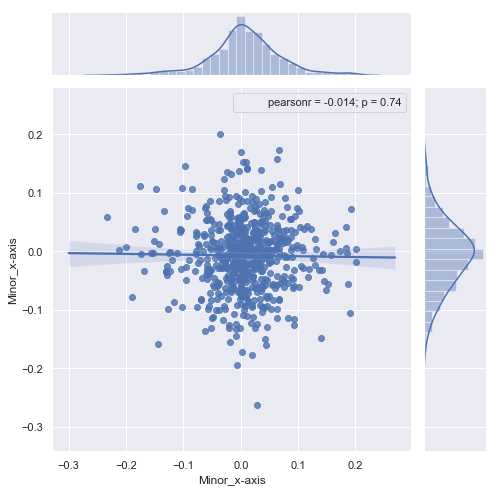

In [81]:

sns.set(style = "darkgrid", color_codes = True)
j = sns.jointplot(x = tonnetz[tonnetz['Class'] == 'drilling']['Minor_x-axis'], y=tonnetz[tonnetz['Class'] == 'street_music']['Minor_x-axis'],
              kind='reg', color='b', height=7)
j.annotate(scipy.stats.pearsonr)
plt.show();

p-value is 0.74 and corr coeff is -0.014. Thus null hypothesis cannot be rejected. Variables are independed of each other.

## Chroma_stft 
Normalized energy for each chroma bin at each frame

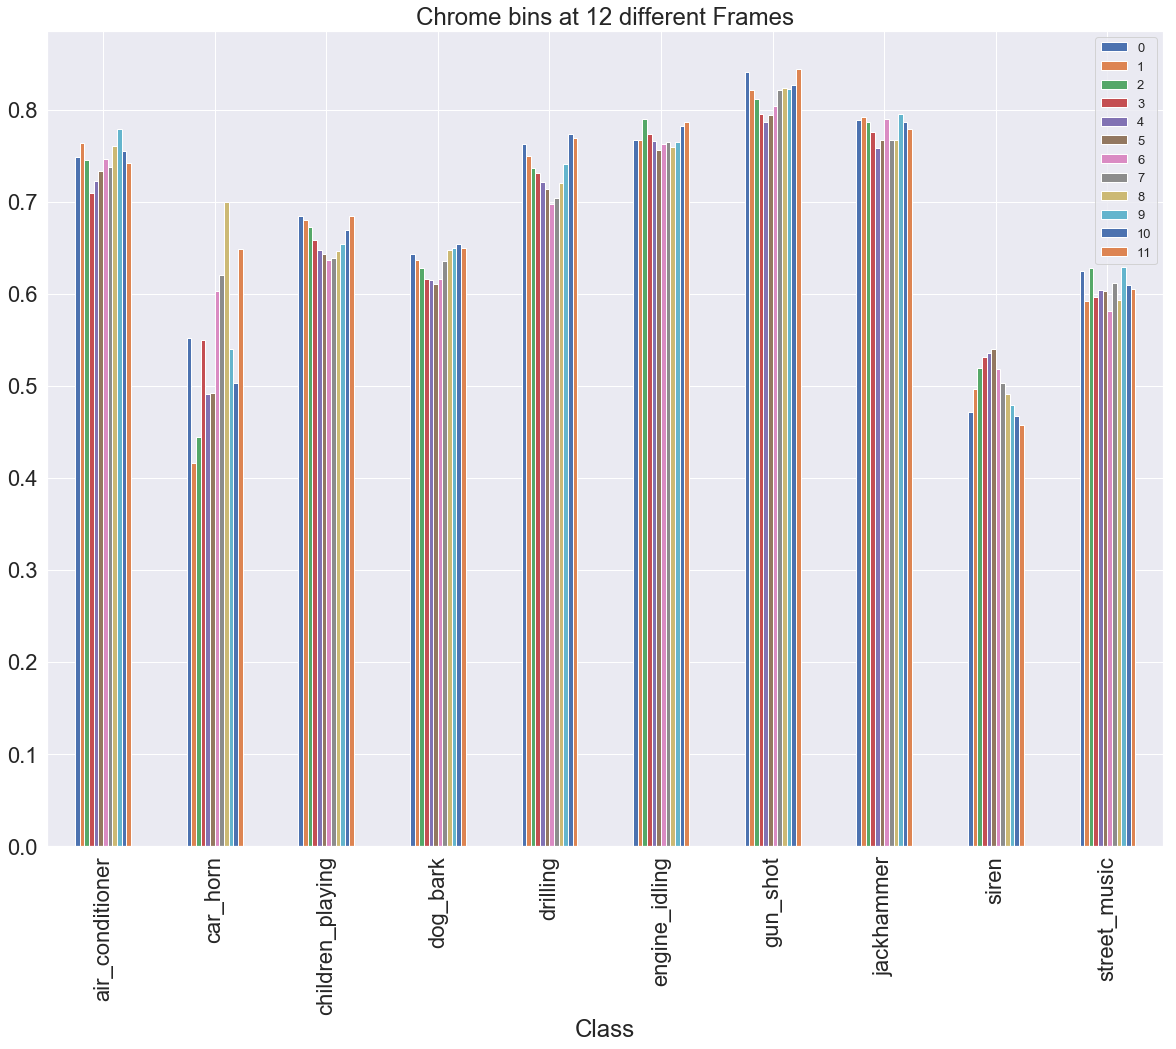

In [62]:
chroma.groupby('Class')[chroma.columns].mean().plot(kind = 'bar', figsize = (20, 15))
plt.legend(loc=1, prop={'size': 13})
plt.title('Chrome bins at 12 different Frames');


Some noticeable difference can be observe from above line chart:
    - Normalized energy represented by chroma features is the highest for __gun_shot__ class for all 12 frames, and on the hand it's the lowest for siren class.
    - For car_horn class it varys at different frames.
    - It's hard to differentiate For children_playing and dog_bark classes.
    - Engine_idling and jackhammer having similar range of enery for all 12 frames.

As number of column increases it will be harder for us to identify any hidden patterns using basic histograms and bar graphs. <br> Let's take advantage of __unsupervised learning__'s visualization techniques. We will be using __"t-SNE"__ : "t-distributed stochastic neighbor embedding" which map samples to 2D space (or 3D).

## TSNE Plots

In [5]:
features = [tonnetz,mfccs,chroma,mel,contrast]

In [24]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from mpl_toolkits.mplot3d import Axes3D

In [25]:
colors = ("red", "green", "blue","red", "green", "blue","red", "green", "blue",'red')
groups = df['Class'].unique()
classes = df.Class

In [26]:
table_dict = {'siren':'C0', 'street_music':'C1', 'drilling':'C2', 'dog_bark':'C3',
              'children_playing':'C4', 'gun_shot':'C5', 'engine_idling':'C6', 'air_conditioner':'C7',
              'jackhammer':'C8', 'car_horn':"C9"}
 
type_val = df.Class.apply(lambda x: table_dict[x])

## TSNE over tonnetz

In [35]:
table = tonnetz
table = scaler.fit_transform(table.iloc[:,:-1])
tsne = TSNE(n_components = 2, random_state = 0)
projected = tsne.fit_transform(table)
print(projected.shape)

(5435, 2)


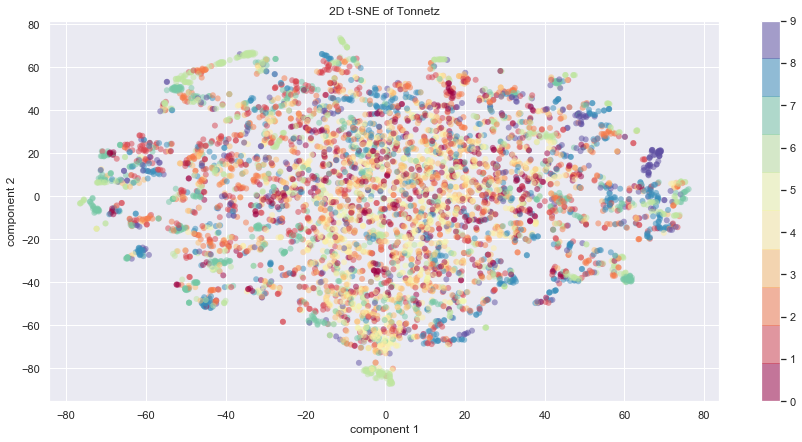

In [36]:
import matplotlib
plt.figure(figsize=(15,7))
plt.scatter(projected[:, 0], projected[:, 1],
            c=df['labels'], edgecolor = 'none', alpha=0.5, 
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('2D t-SNE of Tonnetz')
plt.colorbar();

Above 2D t-sne plot of Tonnetz is not interpretable, let's try to visualize this tonnetz in 3D.

In [37]:
table = tonnetz
table = scaler.fit_transform(table.iloc[:,:-1])
tsne = TSNE(n_components = 3,random_state = 0)
projected = tsne.fit_transform(table)
print(projected.shape)

(5435, 3)


In [38]:
np.savez(mat = projected, file = 'Tonnetz_3d.npz')

In [39]:
projected = np.load('Tonnetz_3d.npz')
projected = projected.f.mat

Text(0.5, 0, 'component 2')

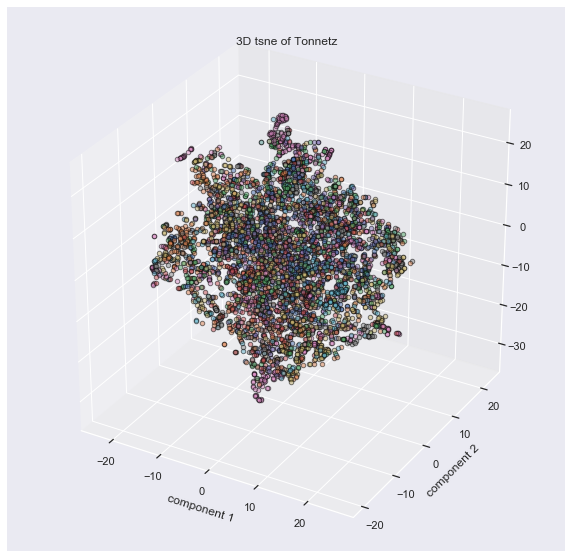

In [40]:

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')

for i in range(projected.shape[0]):
    ax.scatter(projected[i, 0], projected[i, 1], projected[i,2], type_val[i],#colors=colors)#,
               c=type_val[i], edgecolor='none', alpha=0.5) 
               #cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.title('3D tsne of Tonnetz')
plt.ylabel('component 2')

3D plot of tonnetz looks mess, hard to differentiate between classes

## TSNE over mfccs

In [41]:
table = mfccs
table = scaler.fit_transform(table.iloc[:,:-1])
tsne = TSNE(n_components = 2,random_state = 0)
projected = tsne.fit_transform(table)
print(projected.shape)

(5435, 2)


In [42]:
np.savez(mat = projected, file = 'mfccs_2d.npz')

In [43]:
projected = np.load('mfccs_2d.npz')
projected = projected.f.mat

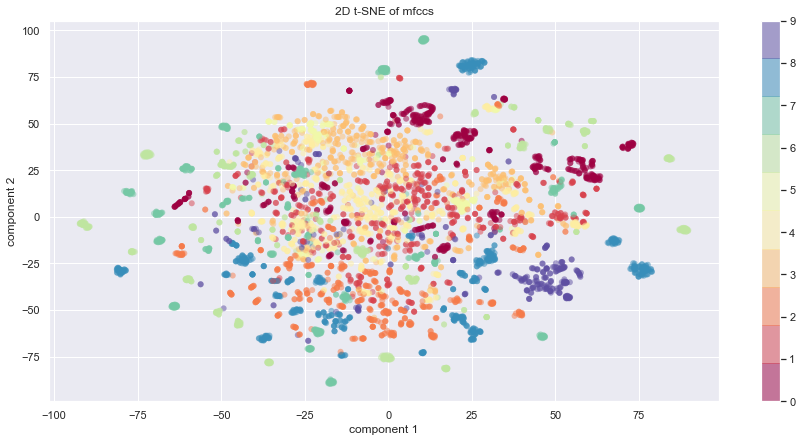

In [45]:
import matplotlib
plt.figure(figsize=(15,7))
plt.scatter(projected[:, 0], projected[:, 1],
            c=df['labels'], edgecolor = 'none', alpha = 0.5, 
            cmap = plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.title('2D t-SNE of mfccs')
plt.ylabel('component 2')
plt.colorbar();

In [46]:
table = mfccs
table = scaler.fit_transform(table.iloc[:,:-1])
tsne = TSNE(n_components = 3,random_state = 0)
projected = tsne.fit_transform(table)
print(projected.shape)

(5435, 3)


In [47]:
np.savez(mat = projected, file = 'mfccs_3d.npz')

In [48]:
projected = np.load('mfccs_3d.npz')
projected = projected.f.mat

Text(0.5, 0, 'component 2')

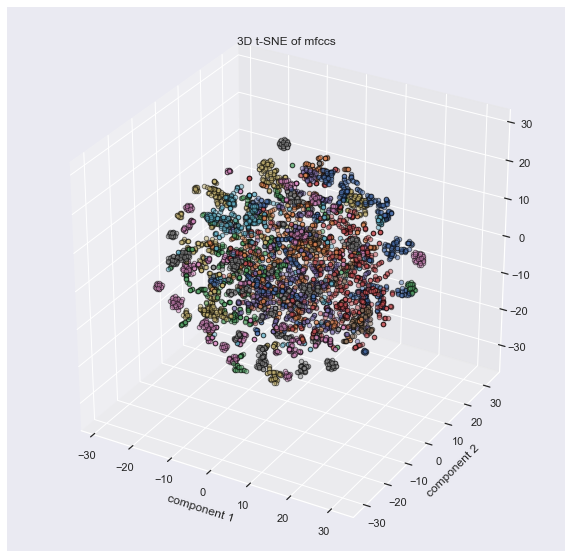

In [49]:

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for i in range(projected.shape[0]):
    ax.scatter(projected[i, 0], projected[i, 1],projected[i,2],type_val[i],#colors=colors)#,
               c=type_val[i], edgecolor='none', alpha=0.5) 
               #cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.title('3D t-SNE of mfccs')
plt.ylabel('component 2')

In 3D t-sne of mfccs above we can see some classes are grouped together. 

## TSNE over chroma

In [50]:
table = chroma
table = scaler.fit_transform(table.iloc[:,:-1])
tsne = TSNE(n_components = 2,random_state = 0)
projected = tsne.fit_transform(table)
print(projected.shape)

(5435, 2)


In [51]:
np.savez(mat = projected, file = 'chroma_2d.npz')

In [123]:
projected = np.load('chroma_2d.npz')
projected = projected.f.mat

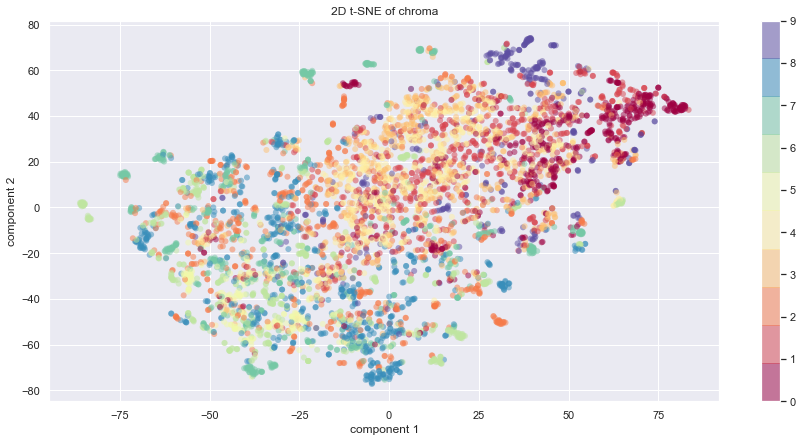

In [52]:
import matplotlib
plt.figure(figsize = (15,7))
plt.scatter(projected[:, 0], projected[:, 1],
            c=df['labels'], edgecolor = 'none', alpha = 0.5, 
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.title('2D t-SNE of chroma')
plt.ylabel('component 2')
plt.colorbar();

In [53]:
table = chroma
table = scaler.fit_transform(table.iloc[:,:-1])
tsne = TSNE(n_components = 3,random_state = 0)
projected = tsne.fit_transform(table)
print(projected.shape)

(5435, 3)


In [54]:
np.savez(mat = projected, file = 'chroma_3d.npz')

In [55]:
projected = np.load('chroma_3d.npz')
projected = projected.f.mat

Text(0.5, 0, 'component 2')

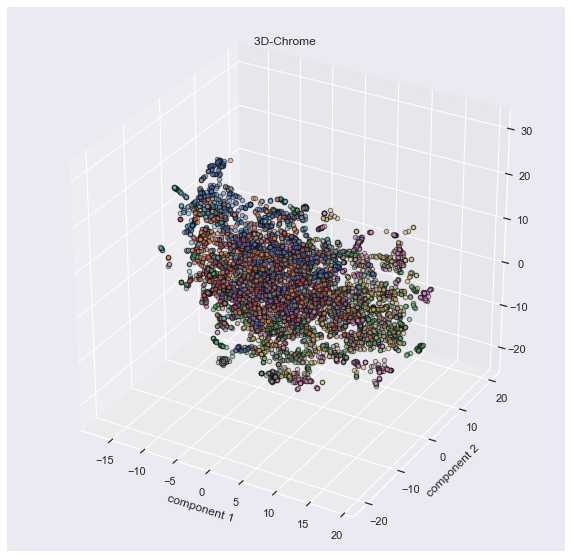

In [56]:

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for i in range(projected.shape[0]):
    ax.scatter(projected[i, 0], projected[i, 1],projected[i,2],type_val[i],#colors=colors)#,
               c=type_val[i], edgecolor='none', alpha=0.5) 
               #cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.title('3D-Chrome ')
plt.ylabel('component 2')

Can't really understand much from above 3-D graph

## TSNE over mel

In [57]:
table = mel
table = scaler.fit_transform(table.iloc[:,:-1])
tsne = TSNE(n_components = 2,random_state = 0)
projected = tsne.fit_transform(table)
print(projected.shape)

(5435, 2)


In [58]:
np.savez(mat = projected, file = 'mel_2d.npz')

In [59]:
projected = np.load('mel_2d.npz')
projected = projected.f.mat

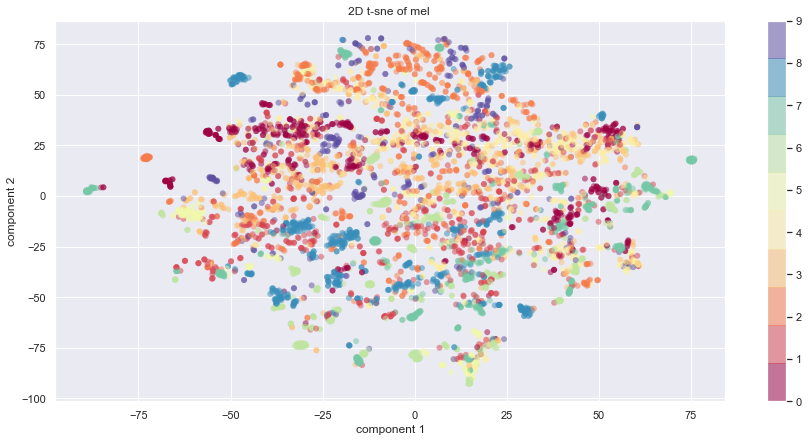

In [61]:
import matplotlib
plt.figure(figsize=(15,7))
plt.scatter(projected[:, 0], projected[:, 1],
            c=df['labels'], edgecolor='none', alpha=0.5, 
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.title('2D t-sne of mel ')
plt.ylabel('component 2')
plt.colorbar();

In [62]:
table = mel
table = scaler.fit_transform(table.iloc[:,:-1])
tsne = TSNE(n_components = 3,random_state = 0)
projected = tsne.fit_transform(table)
print(projected.shape)

(5435, 3)


In [63]:
np.savez(mat = projected, file = 'mel_3d.npz')

In [64]:
projected = np.load('mel_3d.npz')
projected = projected.f.mat

Text(0.5, 0, 'component 2')

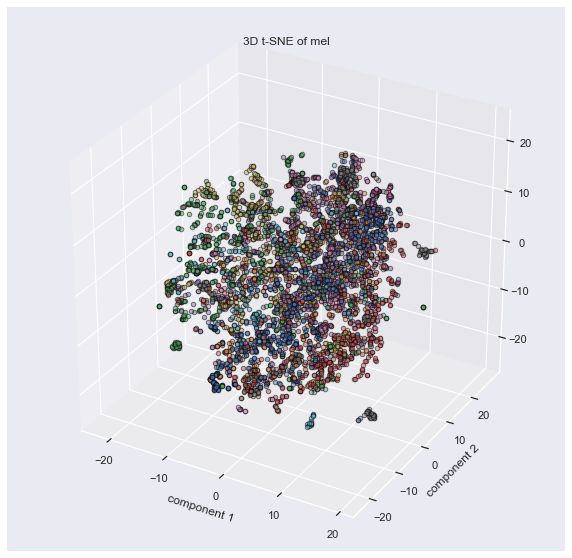

In [66]:

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for i in range(projected.shape[0]):
    ax.scatter(projected[i, 0], projected[i, 1],projected[i,2],type_val[i],#colors=colors)#,
               c=type_val[i], edgecolor='none', alpha=0.5) 
               #cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.title('3D t-SNE of mel')
plt.ylabel('component 2')

Not a good representation of the data.

## TSNE over contrast

In [67]:
table = contrast
table = scaler.fit_transform(table.iloc[:,:-1])
tsne = TSNE(n_components = 2,random_state = 0)
projected = tsne.fit_transform(table)
print(projected.shape)

(5435, 2)


In [68]:
np.savez(mat = projected, file = 'contrast_2d.npz')

In [69]:
projected = np.load('contrast_2d.npz')
projected = projected.f.mat

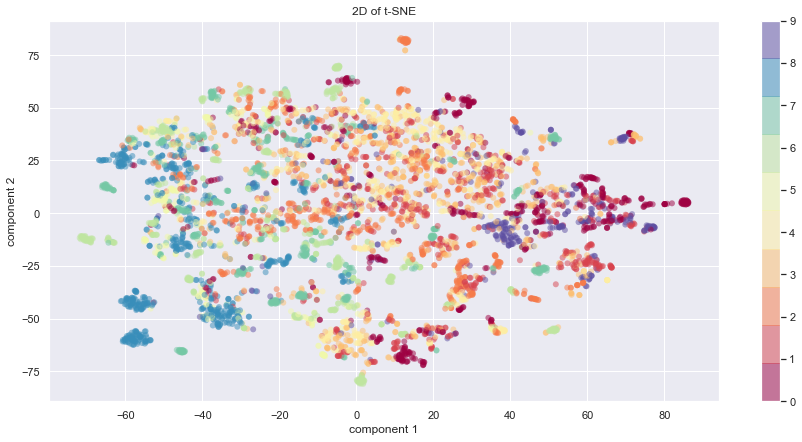

In [71]:
import matplotlib
plt.figure(figsize=(15,7))
plt.scatter(projected[:, 0], projected[:, 1],
            c = df['labels'], edgecolor =  'none', alpha = 0.5, 
            cmap = plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('2D of t-SNE')
plt.colorbar();

In [72]:
table = contrast
table = scaler.fit_transform(table.iloc[:,:-1])
tsne = TSNE(n_components = 3,random_state = 0)
projected = tsne.fit_transform(table)
print(projected.shape)

(5435, 3)


In [73]:
np.savez(mat = projected, file = 'contrast_3d.npz')

In [74]:
projected = np.load('contrast_3d.npz')
projected = projected.f.mat

Text(0.5, 0, 'component 2')

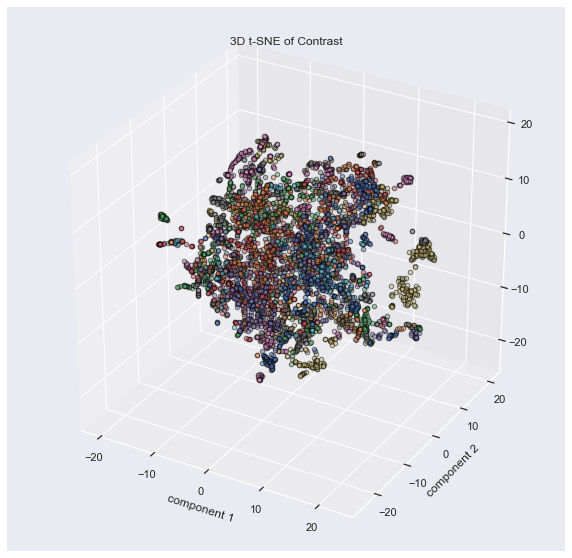

In [75]:

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for i in range(projected.shape[0]):
    ax.scatter(projected[i, 0], projected[i, 1],projected[i,2],type_val[i],#colors=colors)#,
               c=type_val[i], edgecolor='none', alpha=0.5) 
               #cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.title('3D t-SNE of Contrast')
plt.ylabel('component 2')

It's hard to interpret the above data.

### Machine Learning - Baseline modeling

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold, GridSearchCV, train_test_split, KFold
from sklearn.metrics import accuracy_score, classification_report
from warnings import simplefilter
# ignore all future warnings
from warnings import filterwarnings
filterwarnings('ignore')
simplefilter(action='ignore', category = FutureWarning)
X = df.drop(['labels', 'Class', 'SOUND_ID'], axis =1)
y = df['labels']

In [21]:
params = {'penalty' : ['l1', 'l2'],
          'solver'  : ['liblinear'],
          'C'       : [0.001, 0.1, 1]}

lr = LogisticRegression()
clf = GridSearchCV(lr, param_grid = params, cv = 5, scoring = ['accuracy'], n_jobs = -1, refit = 'accuracy')
best_clf = clf.fit(X, y)

In [22]:
print(best_clf.best_params_)
print(best_clf.best_score_)

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
0.7854645814167434


In [26]:
X = df.iloc[:,:-3]
y = df['labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lg = LogisticRegression(penalty = 'l1', C = 1, solver = 'liblinear')
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.90      0.89       112
           1       0.76      0.63      0.69       122
           2       0.82      0.75      0.78       133
           3       0.72      0.59      0.65       117
           4       0.59      0.76      0.66       107
           5       0.86      0.90      0.88        40
           6       0.84      0.88      0.86       130
           7       0.80      0.86      0.83       133
           8       0.86      0.91      0.88       145
           9       0.76      0.67      0.71        48

   micro avg       0.79      0.79      0.79      1087
   macro avg       0.79      0.79      0.78      1087
weighted avg       0.79      0.79      0.79      1087



We achieved an accuracy score of .78 using Logistic regression. <br>
#### Let's try more sophisticated Machine Learning models and try to beat our baseline model's performance

In [27]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [28]:
#Apply stratified sampling to train, test and validation data
X = df.iloc[:,:-3]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### Decison tree Classifier

In [32]:
# Builing a decison tree to find build a tree 
clf = DecisionTreeClassifier(random_state=0,)
parameters = {'max_features': (10,20,8,5,'auto'),
              'max_depth':(5,20,50,100,500,250,20,10)}
# Hyperparameter search
clf = RandomizedSearchCV(clf, parameters,cv=5,n_jobs=-1,n_iter=20,random_state=0)

clf.fit(X_train,y_train)
pred = clf.predict(X_test)
print(accuracy_score(pred,y_test))
print(classification_report(y_test, pred))

0.6826126954921803
                  precision    recall  f1-score   support

 air_conditioner       0.79      0.80      0.80       133
        car_horn       0.44      0.50      0.47        48
children_playing       0.47      0.53      0.50       107
        dog_bark       0.54      0.47      0.50       117
        drilling       0.71      0.71      0.71       133
   engine_idling       0.85      0.85      0.85       130
        gun_shot       0.66      0.57      0.61        40
      jackhammer       0.84      0.81      0.82       145
           siren       0.76      0.79      0.78       112
    street_music       0.54      0.53      0.54       122

       micro avg       0.68      0.68      0.68      1087
       macro avg       0.66      0.66      0.66      1087
    weighted avg       0.68      0.68      0.68      1087



In [33]:
clf = clf.best_estimator_

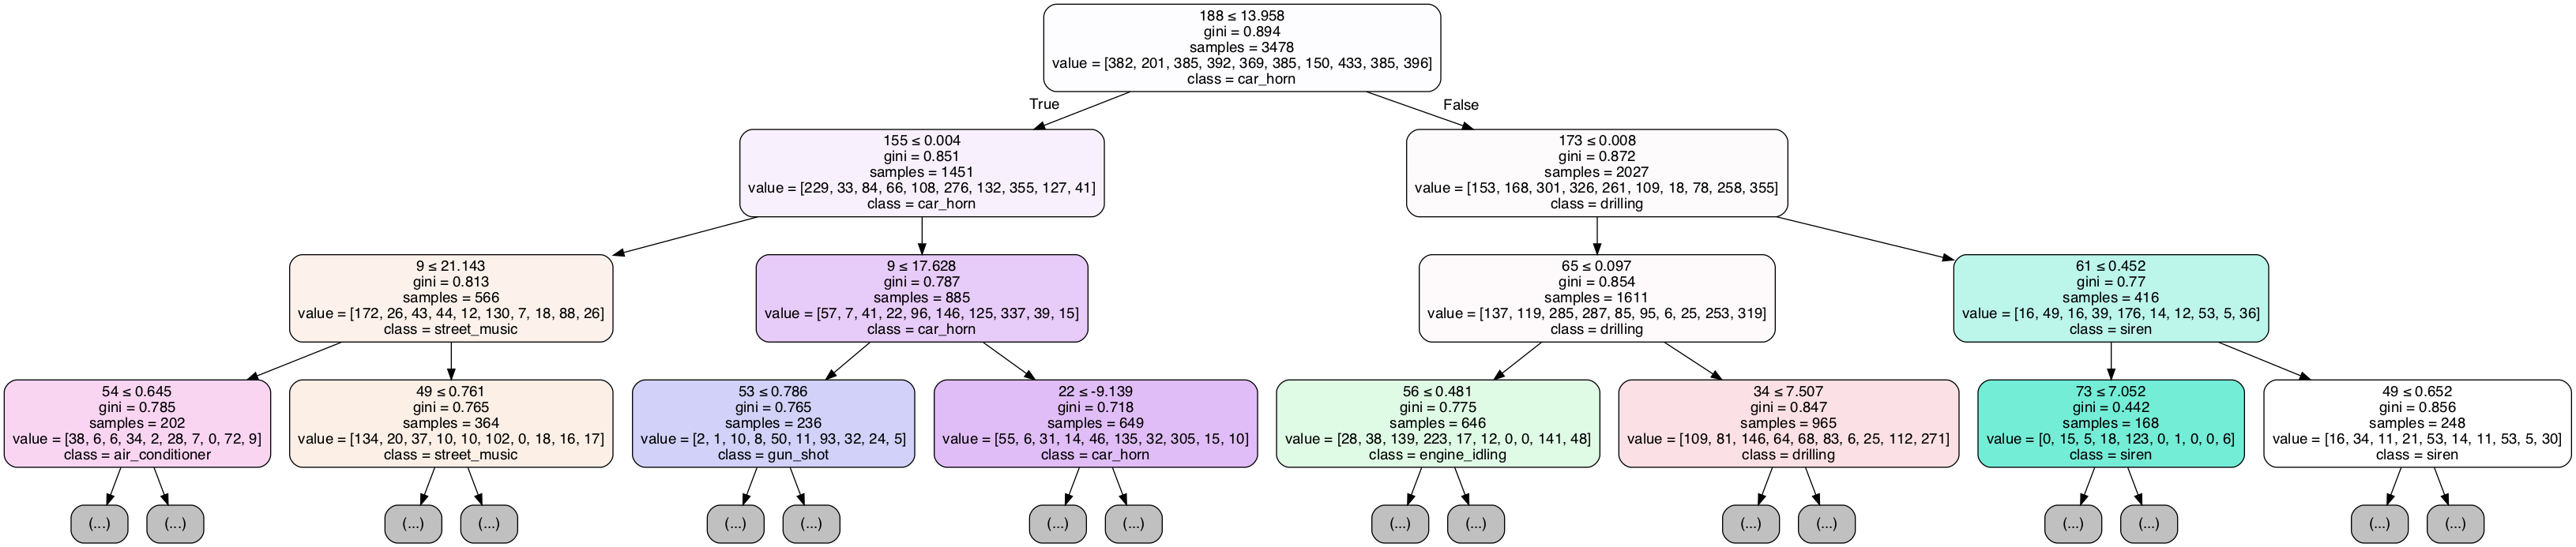

In [97]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
# Decision tree plot
dot_data = StringIO()
export_graphviz(clf,class_names=y_train.unique(), out_file=dot_data,max_depth=3,label='all',
                feature_names=X_train.columns,#node_ids=True,#class_names=y.unique(),
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
#tonnetz,mfccs,chroma,mel,contrast

In [34]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras import regularizers, optimizers
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import recall_score, classification_report, confusion_matrix, accuracy_score
ss = StandardScaler()

from sklearn import metrics

Using TensorFlow backend.


### Gradiant boosting machine

In [35]:
#Apply stratified sampling to train, test and validation data
X = df.iloc[:,:-3]
y = df['labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [36]:
# Apply scaling before the neural network
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [37]:
model = XGBClassifier()
model.fit(X_train, y_train,eval_set=[(X_train, y_train), (X_val, y_val)])

[0]	validation_0-merror:0.37234	validation_1-merror:0.435632
[1]	validation_0-merror:0.3318	validation_1-merror:0.371264
[2]	validation_0-merror:0.314261	validation_1-merror:0.378161
[3]	validation_0-merror:0.299597	validation_1-merror:0.35977
[4]	validation_0-merror:0.280621	validation_1-merror:0.341379
[5]	validation_0-merror:0.268258	validation_1-merror:0.325287
[6]	validation_0-merror:0.256182	validation_1-merror:0.312644
[7]	validation_0-merror:0.246694	validation_1-merror:0.302299
[8]	validation_0-merror:0.23088	validation_1-merror:0.294253
[9]	validation_0-merror:0.220817	validation_1-merror:0.287356
[10]	validation_0-merror:0.218229	validation_1-merror:0.278161
[11]	validation_0-merror:0.210466	validation_1-merror:0.277011
[12]	validation_0-merror:0.203853	validation_1-merror:0.275862
[13]	validation_0-merror:0.19609	validation_1-merror:0.272414
[14]	validation_0-merror:0.193502	validation_1-merror:0.264368
[15]	validation_0-merror:0.190627	validation_1-merror:0.258621
[16]	val

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [38]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test, predictions))

Accuracy: 87.40%
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       112
           1       0.83      0.79      0.81       122
           2       0.90      0.84      0.87       133
           3       0.81      0.74      0.78       117
           4       0.69      0.85      0.76       107
           5       0.95      0.90      0.92        40
           6       0.91      0.96      0.94       130
           7       0.91      0.97      0.94       133
           8       0.94      0.93      0.93       145
           9       0.93      0.85      0.89        48

   micro avg       0.87      0.87      0.87      1087
   macro avg       0.88      0.87      0.87      1087
weighted avg       0.88      0.87      0.87      1087



In [39]:
print(X_train.shape)
print(X_test.shape)

(3478, 193)
(1087, 193)


### Neural network Model

In [40]:
adam = optimizers.Adam(lr=.01)
model = Sequential()
model.add(Dense(64, input_dim = 193, activation = 'relu'))
model.add(Dropout(.5))
#model.add(Dense(43, activation = 'relu'))
#model.add(Dropout(.2))
model.add(Dense(X_train.shape[1]//2, activation = 'relu'))
model.add(Dropout(.2))
model.add(Dense(10, activation = 'softmax'))
model.compile(optimizer = adam, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [41]:
# Saving the model
checkpoint = ModelCheckpoint(filepath='Neural_network.hdfs',
                             save_weights_only=False,
                             monitor='val_loss',save_best_only=True)
# Stop the model if didn't converage after 15 epochs
earlyStop = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=0, mode='auto')
# REduce learning rate if not converaging after 8 epochs
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=8)

In [42]:
with tf.device("/device:CPU:0"):
    history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 150,verbose=2,
                        callbacks=[checkpoint,earlyStop,reduce_lr])

Instructions for updating:
Use tf.cast instead.
Train on 3478 samples, validate on 870 samples
Epoch 1/150
 - 0s - loss: 1.7587 - acc: 0.4347 - val_loss: 1.3245 - val_acc: 0.6621
Epoch 2/150
 - 0s - loss: 1.3558 - acc: 0.5750 - val_loss: 0.9963 - val_acc: 0.7345
Epoch 3/150
 - 0s - loss: 1.1597 - acc: 0.6423 - val_loss: 0.8949 - val_acc: 0.7598
Epoch 4/150
 - 0s - loss: 1.0730 - acc: 0.6659 - val_loss: 0.7862 - val_acc: 0.7816
Epoch 5/150
 - 0s - loss: 1.0693 - acc: 0.6673 - val_loss: 0.9503 - val_acc: 0.7678
Epoch 6/150
 - 0s - loss: 1.0525 - acc: 0.6794 - val_loss: 0.8016 - val_acc: 0.7805
Epoch 7/150
 - 0s - loss: 1.0326 - acc: 0.6860 - val_loss: 0.8392 - val_acc: 0.7839
Epoch 8/150
 - 0s - loss: 1.0191 - acc: 0.6984 - val_loss: 0.8769 - val_acc: 0.7770
Epoch 9/150
 - 0s - loss: 1.0596 - acc: 0.6921 - val_loss: 0.8448 - val_acc: 0.7724
Epoch 10/150
 - 0s - loss: 0.9591 - acc: 0.7125 - val_loss: 0.7031 - val_acc: 0.7874
Epoch 11/150
 - 0s - loss: 0.9192 - acc: 0.7191 - val_loss: 0.66

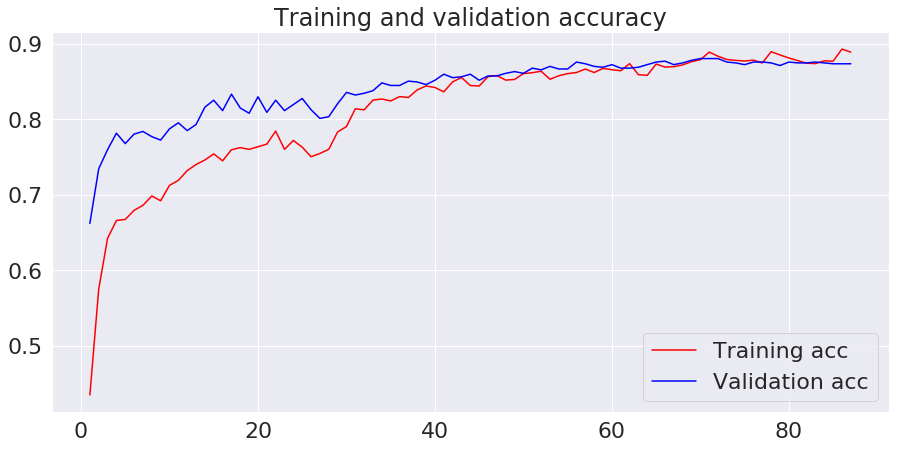

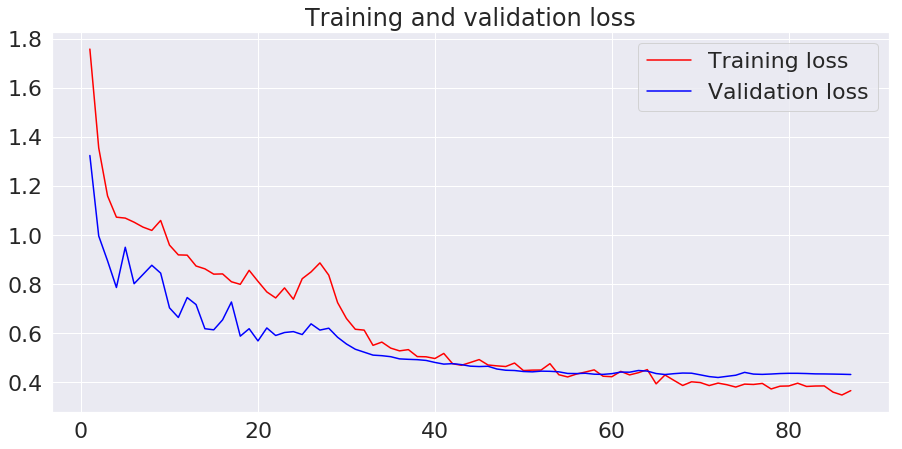

In [43]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.figure(figsize=(15,7))
plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure(figsize=(15,7))
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [35]:
model.load_weights('Neural_network.hdfs')
acc = model.evaluate(X_test,y_test)[1]
print('Test accuracy is ' +str(acc))


1087/1087 [==============================] - 0s 13us/step
Test accuracy is 0.8721251142277231
